In [1]:
import pandas as pd
import numpy as np
import os, inspect
from RGCPD import RGCPD
from RGCPD import BivariateMI
import class_BivariateMI, functions_pp
from stat_models_cont import ScikitModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV
import func_models as fc_utils

%load_ext autoreload
%autoreload 2

# main directory is the directory of this notebook
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) 

# my main directory (which contains folders with data etc)
my_main_dir = 'C:\\Users\\alicj\\Desktop\\WORK'
data_path = os.path.join(my_main_dir, 'data')

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Not able to load in plotting modules, check installment of networkx


## to check if everything works correctly we test predictions for JFM

In [2]:
# directory of target variable data
TV_path_jfm = os.path.join(data_path, 'SPI_JFM.1982_2020.nc')

# directory of precursor data
prec_path = os.path.join(data_path,'sst_1950-2020_1_12_monthly_1.0deg.nc')

# directory of test data 
path_test = os.path.join(my_main_dir, 'test')

# directory for output
output_path = os.path.join(my_main_dir, 'out')

list_of_name_path_jfm = [(1, TV_path_jfm), ('sst', prec_path)]

## random_5 as a traintest method for time efficiency

In [3]:
# defining parameters (for now we will make continuous predictions, as for event predictions the error is the same)
function = class_BivariateMI.corr_map
alpha = 0.01
FDR_control = True 
distance_eps = 500
min_area_in_degrees2 = 5
tfreq = None
start_end_TVyear = (1983, 2020)
start_end_year = (1982, 2019)
TVdates_aggr = False
ext_annual_to_mon = False 
method = 'random_5'
detrend = True
labels = True
prediction = 'continuous'
q = 0.6
lags = np.array([['07-01', '09-01'], ['10-01', '12-01']])            
periodnames = ['JAS', 'OND']                                        
start_end_TVdate = ('01-01', '01-03')                                

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst



AttributeError: 'DataArray' object has no attribute 'drop_vars'

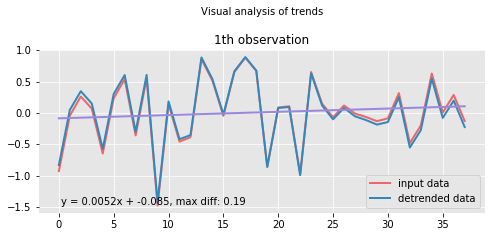

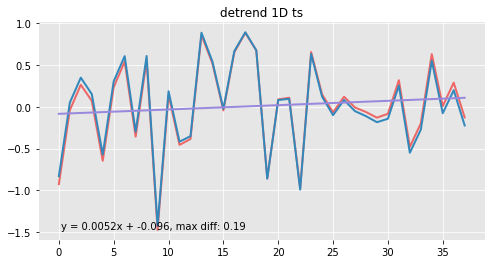

In [5]:
# initialize BMI class
list_for_MI = [BivariateMI(name='sst', func=function, 
                       alpha=alpha, FDR_control=FDR_control, 
                       lags=lags, 
                       distance_eps=distance_eps, min_area_in_degrees2=min_area_in_degrees2)]

# initialize RGCPD class
rg = RGCPD(list_of_name_path=list_of_name_path_jfm,
       list_for_MI=list_for_MI,
       tfreq=tfreq, 
       start_end_TVdate=start_end_TVdate, 
       start_end_year = start_end_year,
       path_outmain=output_path)

# preprocessing target variable 
rg.pp_TV("SPI", kwrgs_core_pp_time = {'start_end_year':start_end_TVyear}, 
         TVdates_aggr=TVdates_aggr, ext_annual_to_mon = ext_annual_to_mon, detrend = detrend)

# preprocessing precursors
rg.pp_precursors()

# train-test split
rg.traintest(method)

# calculating correlation maps
rg.calc_corr_maps()

# clustering regions together
rg.cluster_list_MI()

# rename lags
if periodnames != None:    
    sst = rg.list_for_MI[0]
    sst.prec_labels['lag'] = ('lag', periodnames)
    sst.corr_xr['lag'] = ('lag', periodnames)

# plotting correlation maps
rg.plot_maps_corr()

# plotting significant regions
rg.quick_view_labels()

# getting MI timeseries
rg.get_ts_prec()

## we get an error in the traintest function so we set the method to None to check whether prediction procedure works

In [52]:
method = None

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1982 2019] ('07-01', '09-01')
[1982 2019] ('10-01', '12-01')


C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)



sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 100%)

Plotting Corr maps sst, split 0, lag JAS


C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Plotting Corr maps sst, split 0, lag OND


C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


no sst regions that pass distance_eps and min_area_in_degrees2 citeria

Getting MI timeseries
There are [16] regions in total (list of different splits)


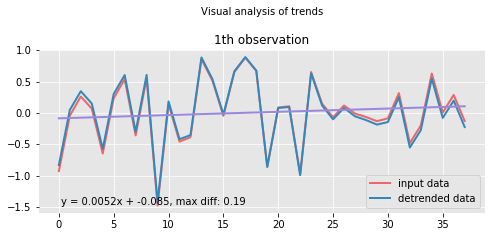

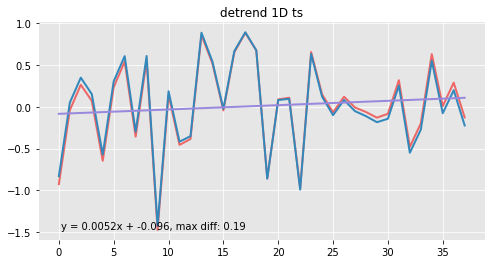

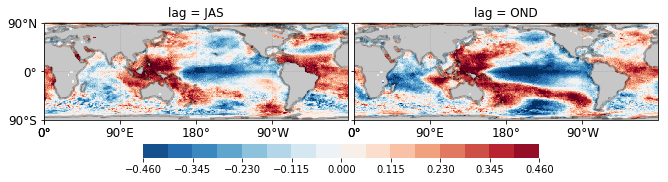

In [53]:
# initialize BMI class
list_for_MI = [BivariateMI(name='sst', func=function, 
                       alpha=alpha, FDR_control=FDR_control, 
                       lags=lags, 
                       distance_eps=distance_eps, min_area_in_degrees2=min_area_in_degrees2)]

# initialize RGCPD class
rg = RGCPD(list_of_name_path=list_of_name_path_jfm,
       list_for_MI=list_for_MI,
       tfreq=tfreq, 
       start_end_TVdate=start_end_TVdate, 
       start_end_year = start_end_year,
       path_outmain=output_path)

# preprocessing target variable 
rg.pp_TV("SPI", kwrgs_core_pp_time = {'start_end_year':start_end_TVyear}, 
         TVdates_aggr=TVdates_aggr, ext_annual_to_mon = ext_annual_to_mon, detrend = detrend)

# preprocessing precursors
rg.pp_precursors()

# train-test split
rg.traintest(method)

# calculating correlation maps
rg.calc_corr_maps()

# clustering regions together
rg.cluster_list_MI()

# rename lags
if periodnames != None:    
    sst = rg.list_for_MI[0]
    sst.prec_labels['lag'] = ('lag', periodnames)
    sst.corr_xr['lag'] = ('lag', periodnames)

# plotting correlation maps
rg.plot_maps_corr()

# plotting significant regions
rg.quick_view_labels()

# getting MI timeseries
rg.get_ts_prec()

In [54]:
if prediction == 'continuous':
        model = ScikitModel(Ridge, verbosity=0)
        alphas = list(np.concatenate([[1E-20],np.logspace(-5,0, 6), np.logspace(.01, 2.5, num=25)]))                       
        kwrgs_model = {'scoringCV':'neg_mean_absolute_error', 'kfold':10, 'alpha':alphas, 'fit_intercept':False} 
    
elif prediction == 'events':
    model = ScikitModel(LogisticRegressionCV, verbosity=0)
    kwrgs_model = {'kfold':10, 'scoring':'neg_brier_score'}


target_ts = rg.TV.RV_ts
target_ts = (target_ts - target_ts.mean()) / target_ts.std()

if prediction == 'events':
    if q >= 0.5:
        target_ts = (target_ts > target_ts.quantile(q)).astype(int)
    elif q < .5:
        target_ts = (target_ts < target_ts.quantile(q)).astype(int)

    BSS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).BSS
    score_func_list = [BSS, fc_utils.metrics.roc_auc_score]


elif prediction == 'continuous':
    RMSE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).RMSE
    MAE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).MAE
    score_func_list = [RMSE_SS, fc_utils.corrcoef, MAE_SS]

out = rg.fit_df_data_ridge(target=target_ts,
                        keys=list(rg.df_data.columns[1:-2]),
                        fcmodel=model,
                        kwrgs_model=kwrgs_model,
                        transformer=None,
                        tau_min=0, tau_max=0) # <- lag should be zero     # lags

predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                             rg.df_data.iloc[:,-2:],
                                                             score_func_list,
                                                             n_boot = 100,
                                                             score_per_test=False,
                                                             blocksize=1,
                                                             rng_seed=1)

lag = 0                          # why do we set lag = 0?
if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
        'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[lag].loc['BSS']),
        'AUC {:.2f}'.format(df_test_m.loc[0].loc[lag].loc['roc_auc_score']),
        '\nTrain score\n',
        'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['BSS']),
        'AUC {:.2f}'.format(df_train_m.mean(0).loc[lag]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
            'RMSE {:.2f}\n'.format(df_test_m.loc[0][lag]['RMSE']),
            'MAE {:.2f}\n'.format(df_test_m.loc[0][lag]['MAE']),
            'corrcoef {:.2f}'.format(df_test_m.loc[0][lag]['corrcoef']),
            '\nTrain score\n',
            'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['RMSE']),
            'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['MAE']),
            'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[lag]['corrcoef']))

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [40]:
df_train_m

0                    
       RMSE  corrcoef       MAE
0  0.362303  0.781114  0.358707

In [41]:
df_test_s_m

0             
  RMSE corrcoef MAE
0  NaN      NaN NaN

In [42]:
df_test_m

array([0], dtype=object)

In [43]:
df_boot

array([0], dtype=object)